# Evaluation of varying encoders

In [2]:
import os
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

sb.set()
# sb.set(rc={'figure.figsize':(16,10)})

# path = "/home/ki/projects/work/osr/data/experiments/vary-encoder-2021-05-21-11-16-16/"
path = "/home/ki/projects/work/osr/data/experiments/vary-encoder-2021-06-21-20-47-55/"

paths = [
    # "./cifar-10/softmax/features-resnet-50/results.pkl",
    "./cifar-10/softmax/features-densenet-121/results.pkl",
    "./cifar-10/softmax/features-densenet-121-pretrained/results.pkl",
    "./cifar-10/softmax/features-resnet-18/results.pkl",
    "./cifar-10/softmax/features-lenet-5/results.pkl",
    # "./svhn/softmax/features-resnet-50/results.pkl",
    # "./svhn/softmax/features-resnet-18/results.pkl",
    # "./svhn/softmax/features-densenet-121/results.pkl",
    # "./svhn/softmax/features-densenet-121-pretrained/results.pkl",
    # "./svhn/softmax/features-lenet-5/results.pkl",
    # "./cifar-100/softmax/features-resnet-50/results.pkl",
    "./cifar-100/softmax/features-densenet-121/results.pkl",
    "./cifar-100/softmax/features-densenet-121-pretrained/results.pkl",
    "./cifar-100/softmax/features-lenet-5/results.pkl",
    "./cifar-100/softmax/features-resnet-18/results.pkl",
    # "./tiny-imagenet/softmax/features-resnet-50/results.pkl",
    "./tiny-imagenet/softmax/features-lenet-5/results.pkl",
    "./tiny-imagenet/softmax/features-resnet-18/results.pkl",
    "./tiny-imagenet/softmax/features-densenet-121/results.pkl",
    "./tiny-imagenet/softmax/features-densenet-121-pretrained/results.pkl"
]

paths = [os.path.join(path, p) for p in paths]
df = pd.concat([pd.read_pickle(p) for p in paths])

df.info(verbose=True)
df["pretrained"] = df["architecture.encoder.pretrained"].apply(lambda x: type(x) is str)

df["Architecture"] = df["architecture.encoder.name"]
df["Architecture"][df["pretrained"]] = "DenseNet121-P"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 4
Data columns (total 140 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Experiment                                     object 
 1   Date                                           object 
 2   Dataset                                        object 
 3   Stage                                          object 
 4   MeanConf/OSR/known/test                        float64
 5   Accuracy/test                                  float64
 6   Loss/test                                      float64
 7   AUROC/OSR/test/softmax                         float64
 8   AUPR-IN/OSR/test/softmax                       float64
 9   AUPR-OUT/OSR/test/softmax                      float64
 10  MeanConf/OSR/known/test/softmax                float64
 11  AUROC/Uncertainty/test/softmax                 float64
 12  AUPR-IN/Uncertainty/test/softmax               flo

<ipython-input-2-0c5ccc35da6a>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Architecture"][df["pretrained"]] = "DenseNet121-P"


In [3]:
print(df["pretrained"].value_counts())
print(df["Architecture"].value_counts())

print(df["architecture.encoder.pretrained"].value_counts())

False    1428
True      476
Name: pretrained, dtype: int64
densenet-121     476
DenseNet121-P    476
resnet-18        476
lenet-5          476
Name: Architecture, dtype: int64
False                                                                                     476
/data_slow/kirchheim/osr2//data/pretrained/densenet-121-imagenet-2010-openset-32x32.pt    336
/data_slow/kirchheim/osr2//data/pretrained/densenet-121-imagenet-2010-openset-64x64.pt    140
Name: architecture.encoder.pretrained, dtype: int64


In [4]:
def preprocess(df):
    #df["Architecture"] = df["architecture.encoder.name"]
    df["Method"] = df["architecture.name"]

    df["Architecture"][df["Architecture"] == "dcnn"] = "DCNN"
    df["Architecture"][df["Architecture"] == "resnet-18"] = "ResNet-18"
    df["Architecture"][df["Architecture"] == "resnet-50"] = "ResNet-50"
    df["Architecture"][df["Architecture"] == "lenet-5"] = "LeNet-5"
    df["Architecture"][df["Architecture"] == "densenet-121"] = "DenseNet-121"

    df["Dataset"][df["Dataset"] == "svhn"] = "SVHN"
    df["Dataset"][df["Dataset"] == "cifar-10"] = "CIFAR-10"
    df["Dataset"][df["Dataset"] == "cifar-100"] = "CIFAR-100"
    df["Dataset"][df["Dataset"] == "tiny-imagenet"] = "Tiny-ImageNet"

    df["Method"][df["Method"] == "softmax"] = "Softmax"
    df["Method"][df["Method"] == "ceb"] = "CEB"


    if True:
        temp_scl = df[df["Method"] == "Softmax"].copy()
        temp_scl = temp_scl[~temp_scl["AUROC/OSR/test/TempScaling"].isna()]
        temp_scl["AUROC/OSR/test"] = temp_scl["AUROC/OSR/test/TempScaling"]
        temp_scl["AUROC/Uncertainty/test"] = temp_scl["AUROC/Uncertainty/test/TempScaling"]
        temp_scl["AUROC/Error/test"] = temp_scl["AUROC/Uncertainty/test/TempScaling"]
        temp_scl["AUPR-OUT/Uncertainty/test"] = temp_scl["AUPR-OUT/Uncertainty/test/TempScaling"]
        temp_scl["AUPR-IN/Uncertainty/test"] = temp_scl["AUPR-IN/Uncertainty/test/TempScaling"]
        temp_scl["AUPR-IN/OSR/test"] = temp_scl["AUPR-IN/OSR/test/TempScaling"]
        temp_scl["AUPR-OUT/OSR/test"] = temp_scl["AUPR-OUT/OSR/test/TempScaling"]
        temp_scl["Method"] = "TempScaling"
        df =  pd.concat([df, temp_scl])

    if True:
        mcd = df[df["Method"] == "Softmax"].copy()
        mcd = mcd[~mcd["AUROC/OSR/test/MCD"].isna()]
        mcd["AUROC/OSR/test"] = mcd["AUROC/OSR/test/MCD"]
        mcd["AUROC/Uncertainty/test"] = mcd["AUROC/Uncertainty/test/MCD"]
        mcd["AUROC/Error/test"] = mcd["AUROC/Uncertainty/test/MCD"]
        mcd["AUPR-OUT/Uncertainty/test"] = mcd["AUPR-OUT/Uncertainty/test/MCD"]
        mcd["AUPR-IN/Uncertainty/test"] = mcd["AUPR-IN/Uncertainty/test/MCD"]
        mcd["AUPR-IN/OSR/test"] = mcd["AUPR-IN/OSR/test/MCD"]
        mcd["AUPR-OUT/OSR/test"] = mcd["AUPR-OUT/OSR/test/MCD"]
        mcd["Method"] = "MCD"
        df =  pd.concat([df, mcd])

    if False:
        mcd = df[df["Method"] == "Softmax"].copy()
        mcd = mcd[~mcd["AUROC/OSR/test/random"].isna()]
        mcd["AUROC/OSR/test"] = mcd["AUROC/OSR/test/random"]
        mcd["AUROC/Uncertainty/test"] = mcd["AUROC/Uncertainty/test/random"]
        mcd["AUROC/Error/test"] = mcd["AUROC/Uncertainty/test/random"]
        mcd["AUPR-OUT/Uncertainty/test"] = mcd["AUPR-OUT/Uncertainty/test/random"]
        mcd["AUPR-IN/Uncertainty/test"] = mcd["AUPR-IN/Uncertainty/test/random"]
        mcd["AUPR-IN/OSR/test"] = mcd["AUPR-IN/OSR/test/random"]
        mcd["AUPR-OUT/OSR/test"] = mcd["AUPR-OUT/OSR/test/random"]
        mcd["Method"] = "Random"
        df =  pd.concat([df, mcd])

    if True:
        mcd = df[df["Method"] == "Softmax"].copy()
        mcd = mcd[~mcd["AUROC/OSR/test/OpenMax"].isna()]
        mcd["AUROC/OSR/test"] = mcd["AUROC/OSR/test/OpenMax"]
        mcd["AUROC/Uncertainty/test"] = mcd["AUROC/Uncertainty/test/OpenMax"]
        mcd["AUROC/Error/test"] = mcd["AUROC/Uncertainty/test/OpenMax"]
        mcd["AUPR-OUT/Uncertainty/test"] = mcd["AUPR-OUT/Uncertainty/test/OpenMax"]
        mcd["AUPR-IN/Uncertainty/test"] = mcd["AUPR-IN/Uncertainty/test/OpenMax"]
        mcd["AUPR-IN/OSR/test"] = mcd["AUPR-IN/OSR/test/OpenMax"]
        mcd["AUPR-OUT/OSR/test"] = mcd["AUPR-OUT/OSR/test/OpenMax"]
        mcd["Method"] = "OpenMax"
        df =  pd.concat([df, mcd])

    if True:
        mcd = df[df["Method"] == "Softmax"].copy()
        mcd = mcd[~mcd["AUROC/OSR/test/ODIN"].isna()]
        mcd["AUROC/OSR/test"] = mcd["AUROC/OSR/test/ODIN"]
        mcd["AUROC/Uncertainty/test"] = mcd["AUROC/Uncertainty/test/ODIN"]
        mcd["AUROC/Error/test"] = mcd["AUROC/Uncertainty/test/ODIN"]
        mcd["AUPR-OUT/Uncertainty/test"] = mcd["AUPR-OUT/Uncertainty/test/ODIN"]
        mcd["AUPR-IN/Uncertainty/test"] = mcd["AUPR-IN/Uncertainty/test/ODIN"]
        mcd["AUPR-IN/OSR/test"] = mcd["AUPR-IN/OSR/test/ODIN"]
        mcd["AUPR-OUT/OSR/test"] = mcd["AUPR-OUT/OSR/test/ODIN"]
        mcd["Method"] = "ODIN"
        df =  pd.concat([df, mcd])


    return df

df = preprocess(df)


<ipython-input-4-5484d5dee329>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Architecture"][df["Architecture"] == "dcnn"] = "DCNN"
<ipython-input-4-5484d5dee329>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Architecture"][df["Architecture"] == "resnet-18"] = "ResNet-18"
<ipython-input-4-5484d5dee329>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Architecture"][df["Architecture"] == "resnet-50"] = "ResNet-50"
<ipyt

In [5]:
df2 = df[(df["Dataset"] == "svhn") & (df["Stage"] == "test")]



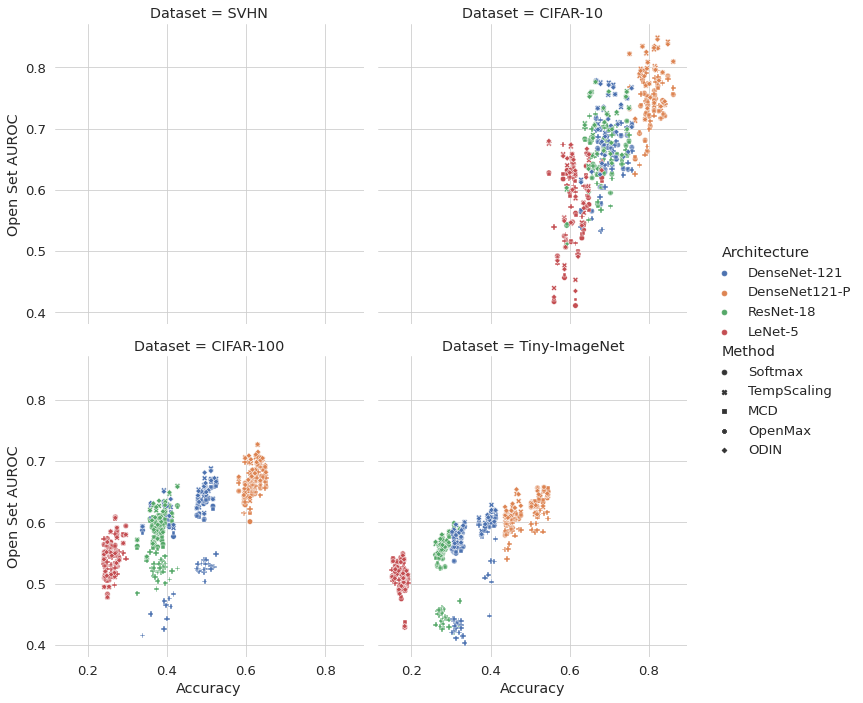

In [6]:
sb.set(context="paper", style="whitegrid", font_scale=1.5)
# sb.set_style("whitegrid", font_scale=5)
dataset_order = ["SVHN", "CIFAR-10", "CIFAR-100", "Tiny-ImageNet"]
idx = df["Stage"] == "test"


g = sb.relplot(data=df[idx], x="Accuracy/test", y="AUROC/OSR/test", col="Dataset",
           hue="Architecture", style="Method", kind="scatter", col_order=dataset_order,
           col_wrap=2, legend=True, s=30)
sb.despine(left=True, bottom=True)
g.set_xlabels("Accuracy")
g.set_ylabels("Open Set AUROC")
g.tight_layout(w_pad=1)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/auroc-and-accuracy.pgf", dpi=300)

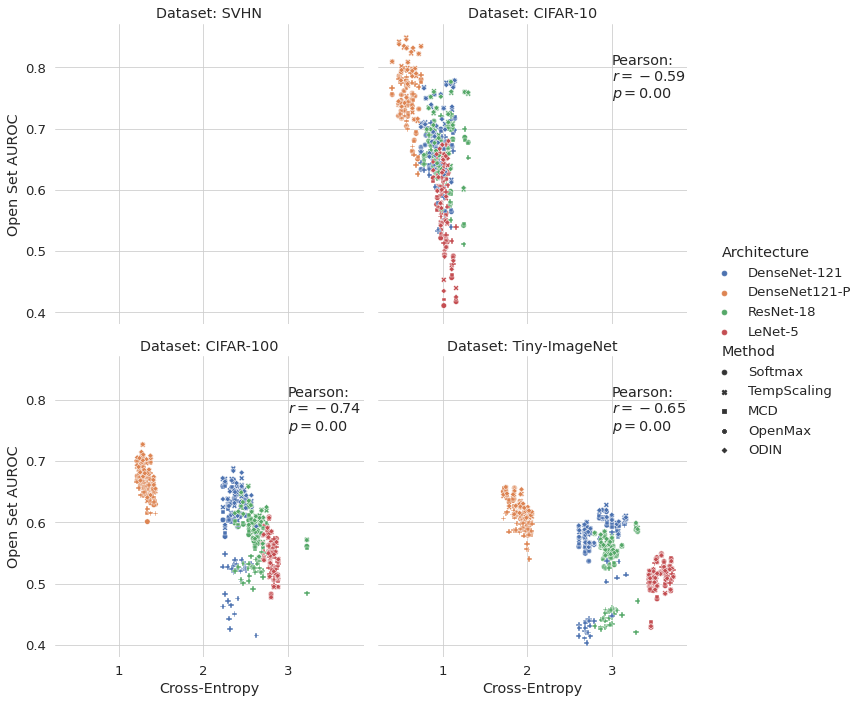

In [7]:
sb.set(context="paper", style="whitegrid", font_scale=1.5)
idx = (df["Stage"] == "test") & (df["Loss/test"] < 5.5)
# df_tmp = df.copy()
# df_tmp["Cross-Entropy"] = df_tmp["Loss/test"]
# df_tmp["AUROC"] = df_tmp["AUROC/OSR/test"]

g = sb.relplot(data=df[idx], x="Loss/test", y="AUROC/OSR/test", col="Dataset",
           hue="Architecture", style="Method", kind="scatter", col_order=dataset_order,
           col_wrap=2, legend=True, s=30)
sb.despine(left=True, bottom=True)


def fun(*args, data=None, **kwargs):
    r,p = stats.pearsonr(data.x, data.y)
    plt.gca().annotate(f"Pearson:\n$r={r:.2f}$\n$p={p:.2f}$ ", (3,0.75))

g.map_dataframe(fun)

g.set_xlabels("Cross-Entropy")
g.set_ylabels("Open Set AUROC")
g.tight_layout(w_pad=1)
g.set_titles("Dataset: {col_name}")
# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/auroc-and-loss.pgf", dpi=300)

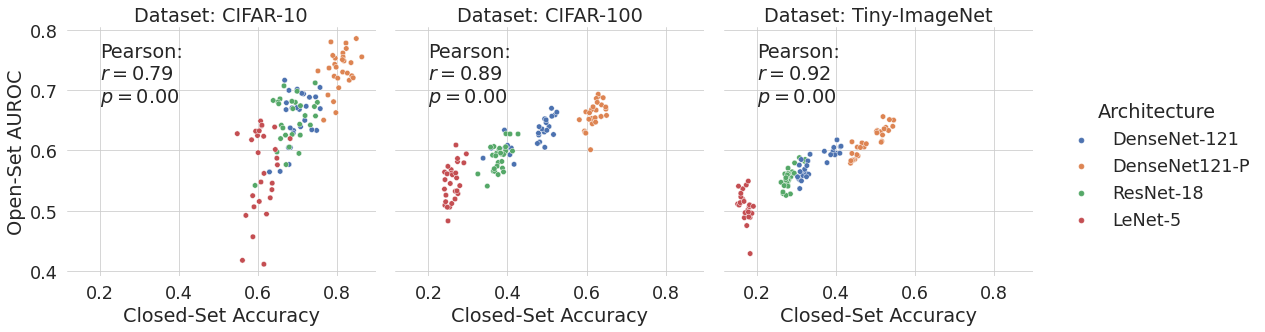

In [8]:
from scipy import stats

sb.set(context="paper", style="whitegrid", font_scale=2)

ds = ["CIFAR-10", "CIFAR-100", "Tiny-ImageNet"]
idx = (df["Stage"] == "test") & (df["Dataset"].isin(ds) ) & (df["Method"] == "Softmax")
# df_tmp = df.copy()
# df_tmp["Closed-Set Accuracy"] = df_tmp["Accuracy/test"]
# df_tmp["Open-Set AUROC"] = df_tmp["AUROC/OSR/test"]

g = sb.relplot(data=df[idx], x="Accuracy/test", y="AUROC/OSR/test", col="Dataset",
           hue="Architecture", kind="scatter", col_order=ds,
           col_wrap=3, legend=True, s=30)
sb.despine(left=True, bottom=True)

def fun(*args, data=None, **kwargs):
    r,p = stats.pearsonr(data.x, data.y)
    plt.gca().annotate(f"Pearson:\n$r={r:.2f}$\n$p={p:.2f}$", (0.2,0.68))
    # print(r,p)
    # print(args)
    # print(kwargs)

g.map_dataframe(fun)


g.set_axis_labels("Closed-Set Accuracy", "Open-Set AUROC")
g.set_titles("Dataset: {col_name}")
g.tight_layout(w_pad=1)


# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/auroc-and-acc-small.pgf", dpi=300)



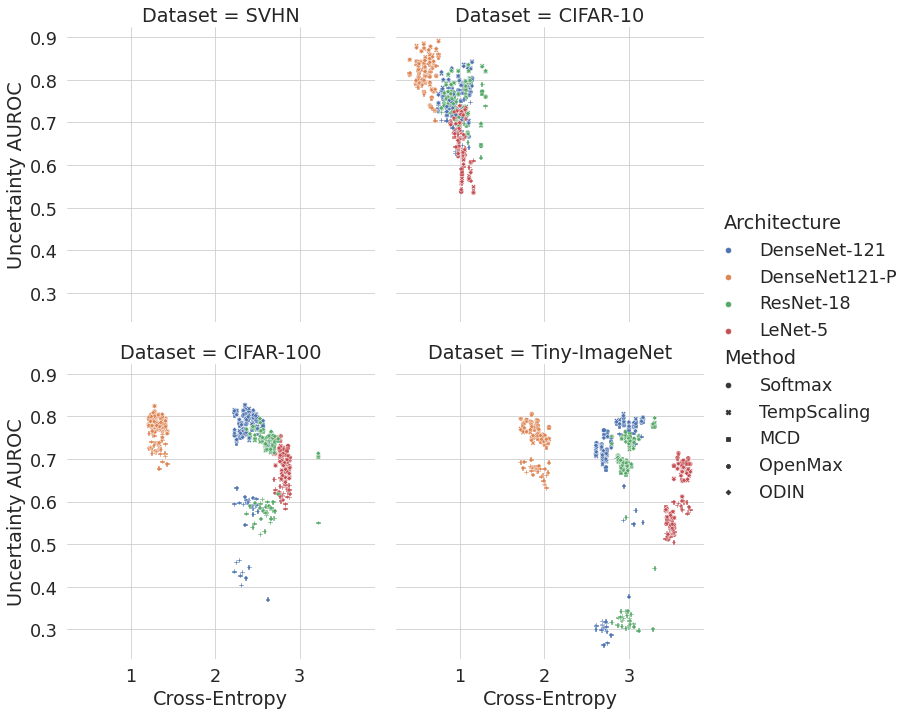

In [9]:
# idx = df["Stage"] == "test"

idx = (df["Stage"] == "test") & (df["Loss/test"] < 5.5)
df_tmp = df.copy()
df_tmp["Cross-Entropy"] = df_tmp["Loss/test"]
df_tmp["Uncertainty AUROC"] = df_tmp["AUROC/Uncertainty/test"]

sb.relplot(data=df_tmp[idx], x="Cross-Entropy", y="Uncertainty AUROC", col="Dataset",
           hue="Architecture", style="Method",kind="scatter", col_order=dataset_order,
           col_wrap=2)
sb.despine(left=True, bottom=True)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/loss-auroc-uncertaint.pgf")

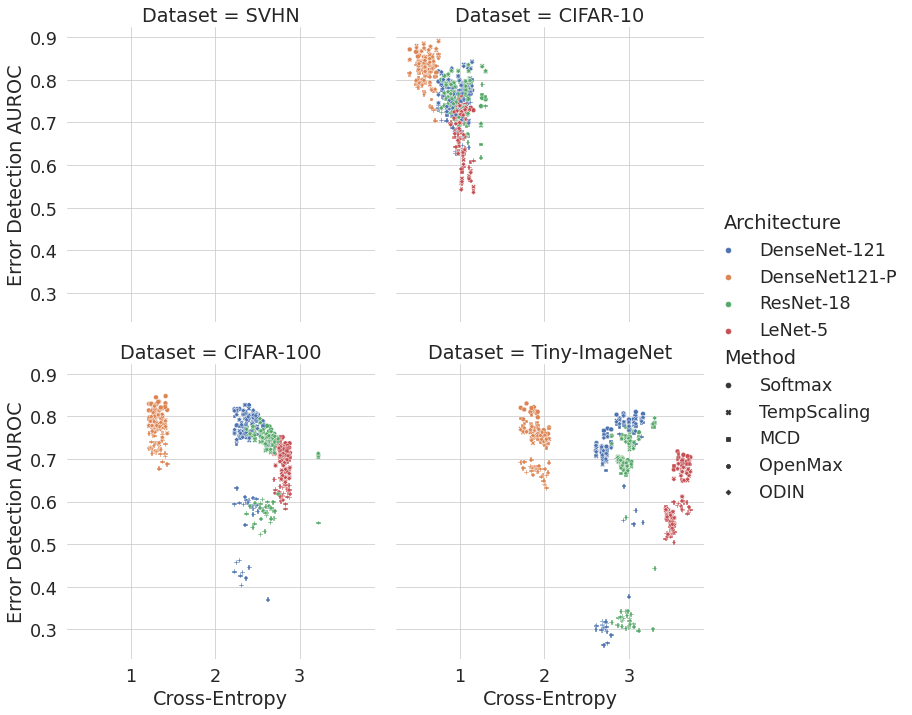

In [10]:
idx = (df["Stage"] == "test") & (df["Loss/test"] < 5.5)
df_tmp = df.copy()
df_tmp["Cross-Entropy"] = df_tmp["Loss/test"]
df_tmp["Error Detection AUROC"] = df_tmp["AUROC/Error/test"]

sb.relplot(data=df_tmp[idx], x="Cross-Entropy", y="Error Detection AUROC", col="Dataset",
           hue="Architecture", style="Method",kind="scatter", col_order=dataset_order, col_wrap=2)
sb.despine(left=True, bottom=True)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/loss-auroc-error.pgf")

## AUPR-IN

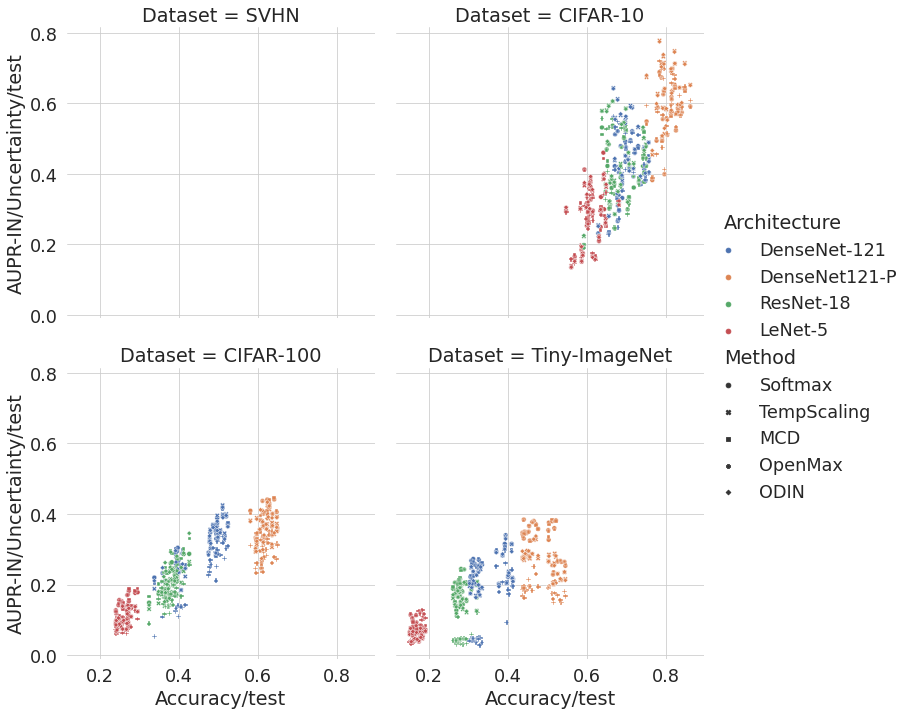

In [11]:

sb.relplot(data=df[idx], x="Accuracy/test", y="AUPR-IN/Uncertainty/test", col="Dataset",
           hue="Architecture", style="Method",kind="scatter", col_order=dataset_order, col_wrap=2)
sb.despine(left=True, bottom=True)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/aupr-in-uncertainty.png", dpi=300)

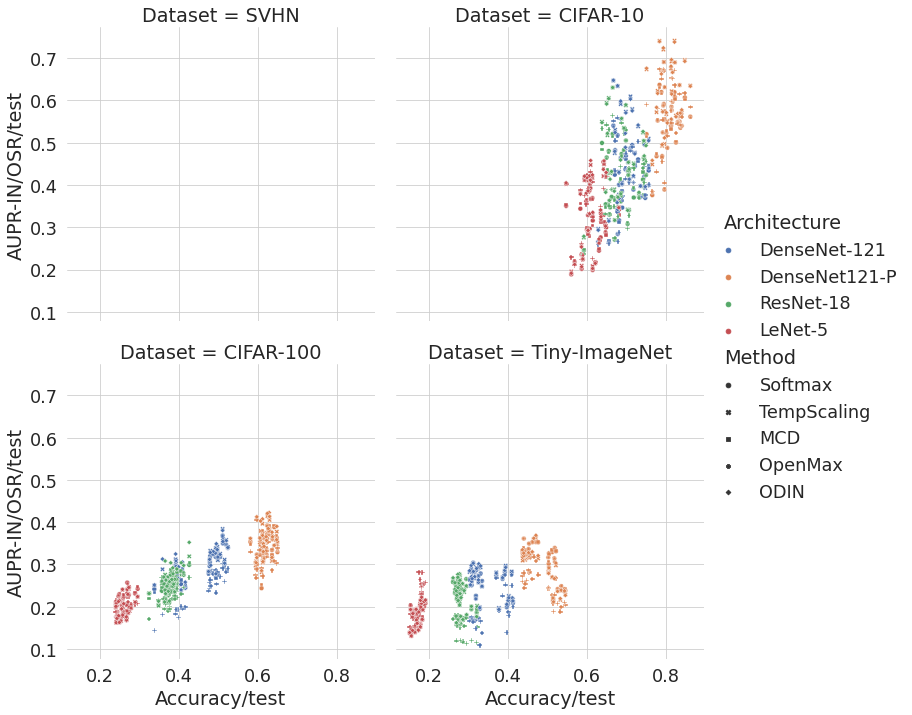

In [12]:
sb.relplot(data=df[idx], x="Accuracy/test", y="AUPR-IN/OSR/test", col="Dataset",
           hue="Architecture", style="Method",kind="scatter", col_order=dataset_order, col_wrap=2)

sb.despine(left=True, bottom=True)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/aupr-osr-uncertainty.png", dpi=300, col_order=dataset_order)

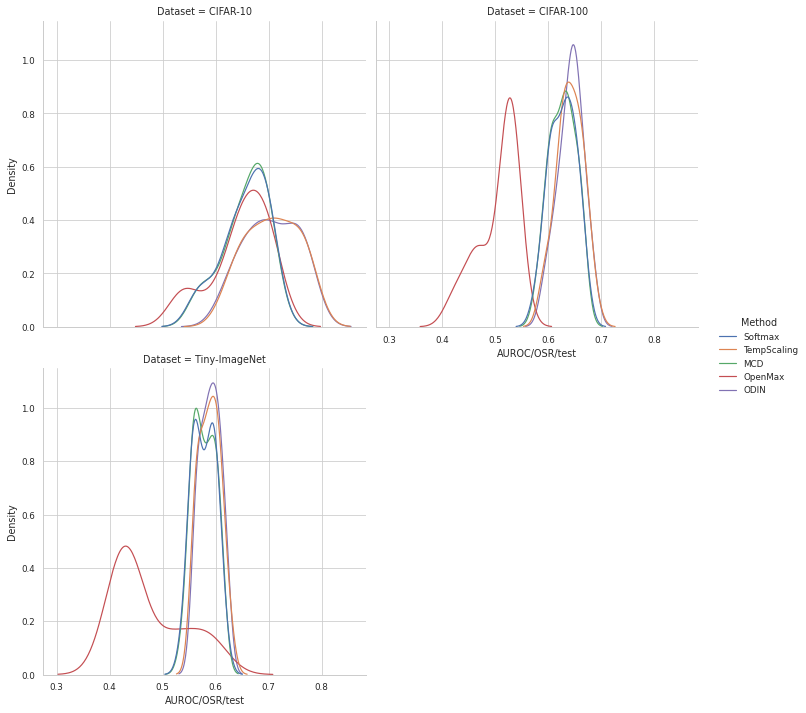

In [13]:
sb.set_context("paper")
sb.set_style("whitegrid")

tmpidx = (df["Stage"] == "test") & (df["Architecture"] == "DenseNet-121")
sb.displot(data=df[tmpidx], x="AUROC/OSR/test", col="Dataset",
           hue="Method", kind="kde", col_wrap=2, col_order=dataset_order)

# sb.despine(left=True, bottom=True)



In [14]:
import scipy.stats as stats

for dataset in dataset_order:
    for method in ["Softmax", "CEB", "TempScaling", "MCD", "ODIN"]:
        for arch in ["LeNet", "ResNet-18", "ResNet-50", "DenseNet-121"]:
            idx = (df["Stage"] == "test") & (df["Dataset"] == dataset) & (df["Architecture"] == arch)
            if idx.sum() < 2:
                print("ERROR")
                continue
            r, p = stats.pearsonr(x=df[idx]["Accuracy/test"], y=df[idx]["AUROC/OSR/test"])
            # tests skewness (need > 8 samples)  and kurtosis (needs > 20 samples)
            _, acc_normal_p = stats.normaltest(df[idx]["Accuracy/test"])
            _, roc_normal_p = stats.normaltest(df[idx]["AUROC/OSR/test"])
            sig = "Sig" if p < 0.05 else "Not"
            roc_normal = "Normal" if roc_normal_p > 0.05 else "NotNorm"
            acc_normal = "Normal" if acc_normal_p > 0.05 else "NotNorm"
            check = p < 0.05 and roc_normal_p > 0.05 and acc_normal_p > 0.05
            print(f"{dataset:<15} {method:<15} {arch:<15} {r:<20} {p:<25} {idx.sum():<15} {check} {sig:<10} {roc_normal:<10} {acc_normal:<10}")


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
CIFAR-10        Softmax         ResNet-18       0.2987868812828933   0.000335958147800674      140             True Sig        Normal     Normal    
ERROR
CIFAR-10        Softmax         DenseNet-121    0.3279837772315177   7.622666975741138e-05     140             True Sig        Normal     Normal    
ERROR
CIFAR-10        CEB             ResNet-18       0.2987868812828933   0.000335958147800674      140             True Sig        Normal     Normal    
ERROR
CIFAR-10        CEB             DenseNet-121    0.3279837772315177   7.622666975741138e-05     140             True Sig        Normal     Normal    
ERROR
CIFAR-10        TempScaling     ResNet-18       0.2987868812828933   0.000335958147800674      140             True Sig        Normal     Normal    
ERROR
CIFAR-10        TempScaling     DenseNet-121    0.3279837772315177   7.622666975741138e-05     140 

## Correlation  between metrics

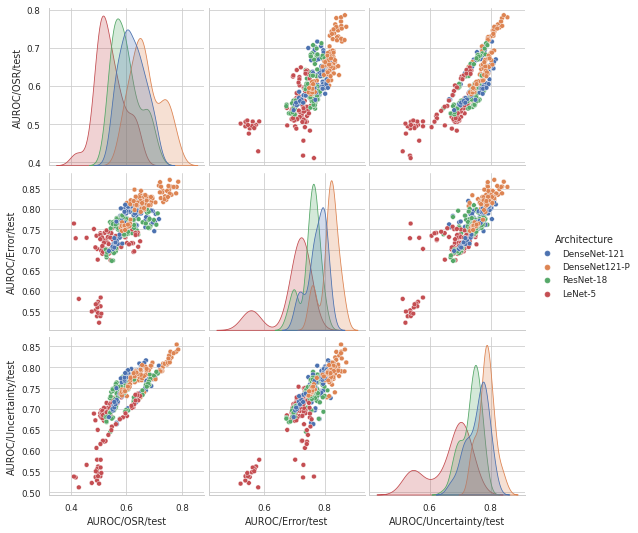

In [15]:
idx = (df["Stage"] == "test") & (df["Method"] == "Softmax")
sb.pairplot(df[idx], hue="Architecture", vars=["AUROC/OSR/test", "AUROC/Error/test", "AUROC/Uncertainty/test"])
plt.show()

In [16]:
if False:
    for dataset in dataset_order:
        for method in ["Softmax", "CEB", "TempScaling", "MCD", "ODIN"]:
            idx = (df["Stage"] == "test") & (df["Dataset"] == dataset) & (df["Method"] == method)
            sb.pairplot(df[idx], hue="Architecture", vars=["AUROC/OSR/test", "AUROC/Error/test", "AUROC/Uncertainty/test"])
            plt.suptitle(f"{dataset} - {method}", y=1.025)
            plt.show()

# Plot Learning Curves aggregated over all runs

In [17]:
from os.path import join
from omegaconf import OmegaConf
import os
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt


def load_metrics(path, runs=20) -> pd.DataFrame:
    paths = []
    config = []

    for d in range(runs):
        try:
            config_path = join(path, f"version_{d}", "config.yaml")
            paths.append(join(path, f"version_{d}", "metrics.csv"))
            config.append(OmegaConf.load(config_path))
        except FileNotFoundError:
            print(f"Missing: {config_path}")

    dfs = []

    for p, c in zip(paths, config):
        if not os.path.exists(p):
            continue

        df = pd.read_csv(p)
        df["Architecture"] = [c["architecture"]["encoder"]["name"]] * len(df)
        df["Dataset"] = [c["ossim"]["dataset"]["name"]] * len(df)
        df["Method"] = [c["architecture"]["name"]] * len(df)

        df["pretrained"] = type(c["architecture"]["encoder"]["pretrained"]) is str
        df["Architecture"][df["pretrained"]] = "DenseNet121-P"

        dfs.append(df)

    metrics = pd.concat(dfs)
    return metrics

def prep_metrics(metrics):
    metrics["Architecture"][metrics["Architecture"] == "resnet-18"] = "ResNet-18"
    metrics["Architecture"][metrics["Architecture"] == "resnet-50"] = "ResNet-50"
    metrics["Architecture"][metrics["Architecture"] == "lenet-5"] = "LeNet-5"
    metrics["Architecture"][metrics["Architecture"] == "densenet-121"] = "DenseNet-121"

    metrics["Dataset"][metrics["Dataset"] == "svhn"] = "SVHN"
    metrics["Dataset"][metrics["Dataset"] == "cifar-10"] = "CIFAR-10"
    metrics["Dataset"][metrics["Dataset"] == "cifar-100"] = "CIFAR-100"
    metrics["Dataset"][metrics["Dataset"] == "tiny-imagenet"] = "Tiny-ImageNet"

    metrics["Method"][metrics["Method"] == "softmax"] = "Softmax"
    metrics["Method"][metrics["Method"] == "ceb"] = "CEB"
    metrics["Epoch"] = metrics["epoch"]
    return metrics

In [18]:
def make_plots(metrics, dataset_order=["CIFAR-10", "CIFAR-100", "Tiny-ImageNet"]):
    #
    # with_value = metrics[(~metrics["Loss/val"].isna()) & (~metrics["AUROC/OSR/val"].isna())]
    # with_value["Open Set AUROC"] = with_value["AUROC/OSR/val"]
    # with_value["Cross-Entropy"] = with_value["Loss/val"]
    #
    # fig, ax = plt.subplots(2,1)
    # #% fig.suptitle(title)
    # sb.lineplot(data=with_value, x="Epoch", y="Cross-Entropy", hue="Architecture", ax=ax[0])
    # sb.lineplot(data=with_value, x="Epoch", y="Open Set AUROC", hue="Architecture", ax=ax[1])
    # # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    # plt.show()


    with_value = metrics[~metrics["Loss/val"].isna()]
    g = sb.relplot(
        data=with_value, x="Epoch", y="Loss/val",
        col="Dataset",  hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    g.set_xlabels("Epochs")
    g.set_ylabels("Validation Cross-Entropy")
    g.set_titles("Dataset: {col_name}")
    g.tight_layout(w_pad=1)

    # plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/val-loss-over-time.pgf")
    plt.show()

    ###
    with_value = metrics[~metrics["AUROC/OSR/val"].isna()]
    g = sb.relplot(
        data=with_value, x="Epoch", y="AUROC/OSR/val",
        col="Dataset", hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    g.set_xlabels("Epochs")
    g.set_ylabels("Open Set AUROC")
    g.set_titles("Dataset: {col_name}")
    g.tight_layout(w_pad=1)
    # plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/val-auroc-over-time.pgf")
    plt.show()

    ###
    with_value = metrics[~metrics["AUROC/Uncertainty/val"].isna()]
    sb.relplot(
        data=with_value, x="Epoch", y="AUROC/Uncertainty/val",
        col="Dataset", hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    #plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/auroc-uncertainty.png", dpi=300)
    plt.show()


    with_value = metrics[~metrics["Loss/train"].isna()]
    sb.relplot(
        data=with_value, x="Epoch", y="Loss/train",
        col="Dataset",  hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    plt.show()


    ###
    with_value = metrics[~metrics["AUPR-OUT/OSR/val"].isna()]
    sb.relplot(
        data=with_value, x="Epoch", y="AUPR-OUT/OSR/val",
        col="Dataset", hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    plt.show()

    ###
    with_value = metrics[~metrics["AUPR-IN/OSR/val"].isna()]
    sb.relplot(
        data=with_value, x="Epoch", y="AUPR-IN/OSR/val",
        col="Dataset",  hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    plt.show()

    ###
    with_value = metrics[~metrics["AUPR-OUT/Uncertainty/val"].isna()]
    sb.relplot(
        data=with_value, x="Epoch", y="AUPR-OUT/Uncertainty/val",
        col="Dataset",  hue="Architecture",# , style="event",
        kind="line", col_wrap=3, col_order=dataset_order
    )
    sb.despine(left=True, right=True, bottom=True)
    plt.show()


    return metrics

In [20]:
sb.set_context("paper")
sb.set_style("whitegrid")

path = "/home/ki/projects/work/osr/data/experiments/vary-encoder-2021-06-21-20-47-55/"
paths = [
    # "./cifar-10/softmax/features-resnet-50/",
    "./cifar-10/softmax/features-densenet-121/",
    "./cifar-10/softmax/features-densenet-121-pretrained/",
    "./cifar-10/softmax/features-resnet-18/",
    "./cifar-10/softmax/features-lenet-5/",
    # "./svhn/softmax/features-resnet-50/results.pkl",
    # "./svhn/softmax/features-resnet-18/",
    # "./svhn/softmax/features-densenet-121/",
    # "./svhn/softmax/features-densenet-121-pretrained/",
    # "./svhn/softmax/features-lenet-5/",
    # "./cifar-100/softmax/features-resnet-50/results.pkl",
    "./cifar-100/softmax/features-densenet-121/",
    "./cifar-100/softmax/features-densenet-121-pretrained/",
    "./cifar-100/softmax/features-lenet-5/",
    "./cifar-100/softmax/features-resnet-18/",
    # "./tiny-imagenet/softmax/features-resnet-50/results.pkl",
    "./tiny-imagenet/softmax/features-lenet-5/",
    "./tiny-imagenet/softmax/features-resnet-18/",
    "./tiny-imagenet/softmax/features-densenet-121/",
    "./tiny-imagenet/softmax/features-densenet-121-pretrained/"
            ]

paths = [join(path, p) for p in paths]

metrics = pd.concat([load_metrics(path) for path in paths])
metrics = prep_metrics(metrics)
# make_plots(metrics)

<ipython-input-17-b0351ec477d1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Architecture"][df["pretrained"]] = "DenseNet121-P"
<ipython-input-17-b0351ec477d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["Architecture"][metrics["Architecture"] == "resnet-18"] = "ResNet-18"
<ipython-input-17-b0351ec477d1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics["Architecture"][metrics["Architecture"] == "resnet-5

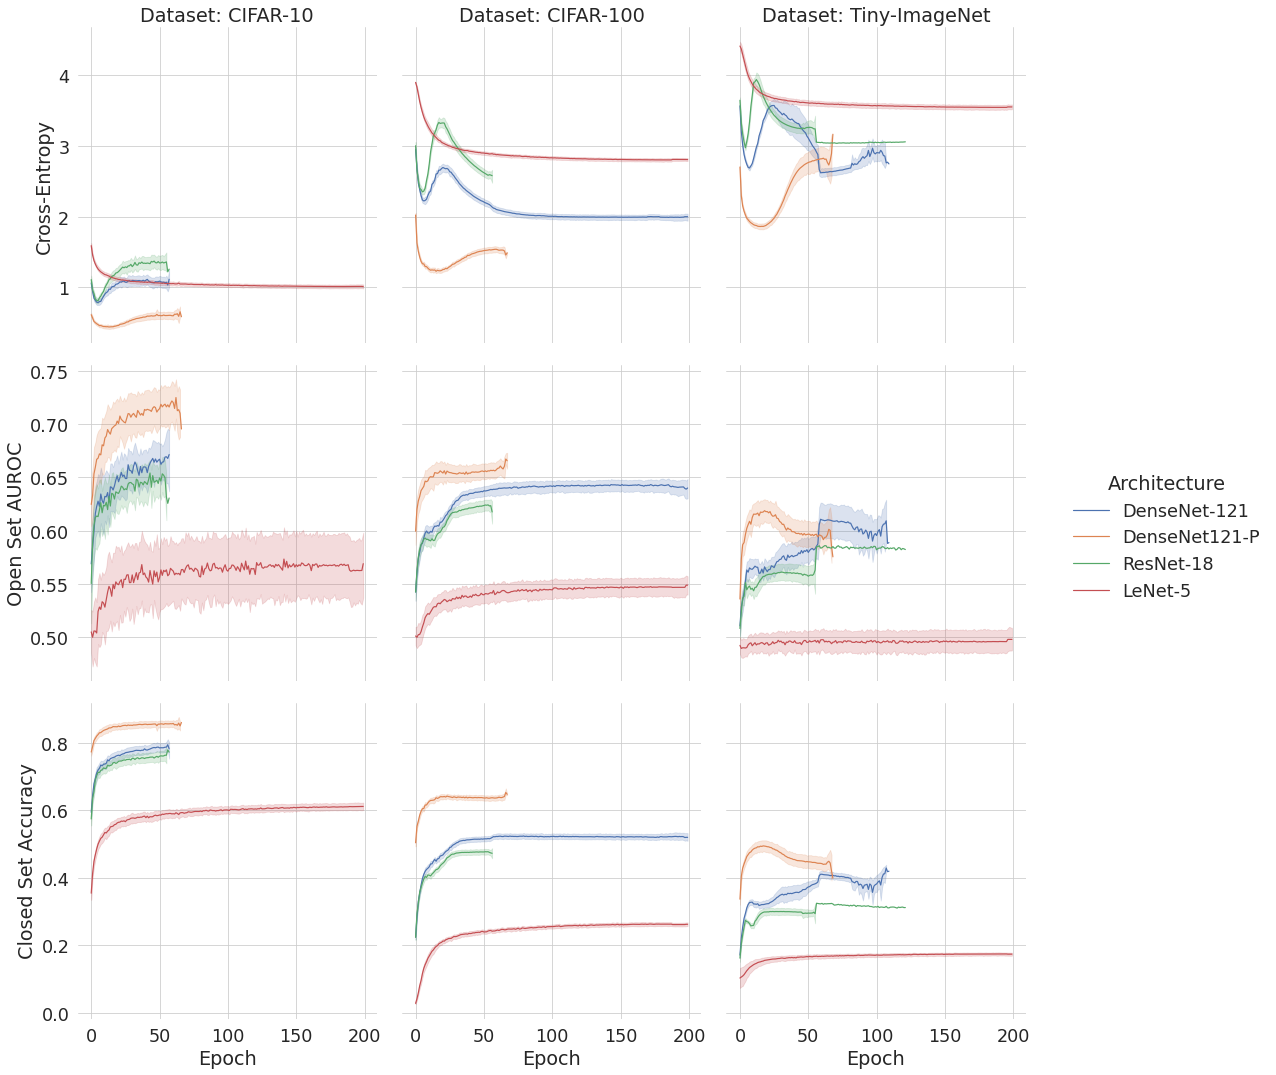

In [30]:
sb.set(context="paper", style="whitegrid", font_scale=2)
with_value = metrics[(~metrics["Loss/val"].isna()) & (metrics["Dataset"].isin(["CIFAR-10", "CIFAR-100", "Tiny-ImageNet"]))]

dfm = with_value.melt(id_vars=['Dataset', 'Architecture', 'Epoch'], value_vars=["Loss/val", "AUROC/OSR/val", "Accuracy/val"])
g = sb.relplot(data=dfm, col='Dataset', hue='Architecture', y="value", x="Epoch", row='variable', kind="line",
           facet_kws={'sharey': "row", 'sharex': True, "margin_titles": True})

g.set_titles(col_template="Dataset: {col_name}", row_template="")
g.axes[0,0].set_ylabel('Cross-Entropy')
g.axes[1,0].set_ylabel('Open Set AUROC')
g.axes[2,0].set_ylabel('Closed Set Accuracy')
# g.set_ylabels("Value")
# g = sb.FacetGrid(dfm, col='Dataset', hue='Architecture', row='variable', sharey='row', margin_titles=True)
# g.map(sb.lineplot, 'Epoch', 'value')
g.despine(left=True, bottom=True)
# xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.savefig("/home/ki/projects/work/papers/osr-reality-check/src/img/val-loss-and-auroc-over-time.pgf")

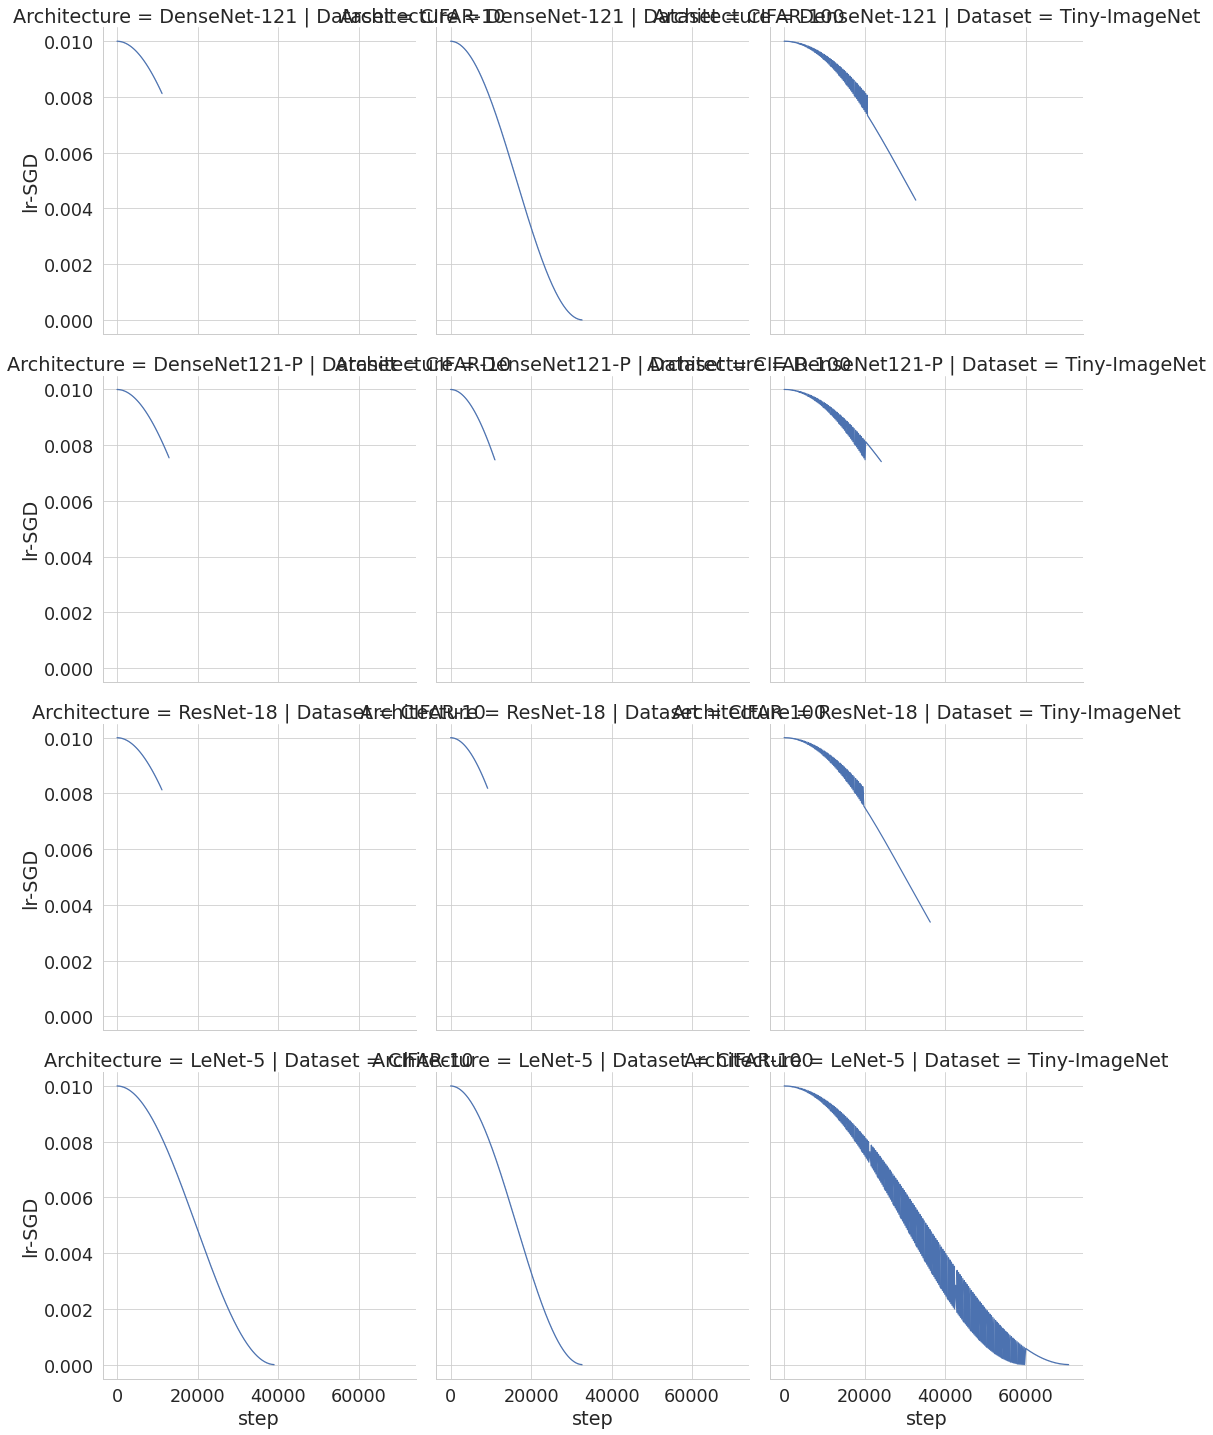

In [29]:
dfa = metrics[~metrics["lr-SGD"].isna()]
sb.relplot(data=dfa, x="step", y="lr-SGD", row="Architecture", kind="line", col='Dataset',)

In [ ]:
idx2 = (df["Method"] == "Softmax") & (df["Stage"] == "test")



sb.relplot(data=df[idx2], x="Loss/test", y="AUROC/OSR/test", col="Dataset",
           hue="Architecture", style="Method", kind="scatter")

plt.xlim(0, 10)
sb.despine(left=True, bottom=True)

# Compare

In [ ]:
idx = (df["Method"] == "Softmax") & (df["Stage"] == "test")

sb.relplot(data=df[idx], col_wrap=2, x="AUROC/OSR/test/softmax", y="Accuracy/test", hue="Architecture", col="Dataset")

In [ ]:
## Some additional tests
from scipy import stats

for dataset in df["Dataset"].unique():
    for arch in df["Architecture"].unique():
        try:
            idx = (df["Method"] == "Softmax") & (df["Stage"] == "test") & (df["Dataset"] == dataset) & (df["Architecture"] == arch)
            auroc = df[idx]['AUROC/OSR/test']
            acc = df[idx]['Accuracy/test']

            print(f"shapiro: {dataset} {arch} {stats.shapiro(auroc)}")
            print(f"pearson: {dataset} {arch} {stats.pearsonr(auroc, acc)}")
        except Exception as e:
            print(f"{dataset} {arch} {e}")



In [ ]:
import numpy as np
#  (df["Method"] == "Softmax") &


for dataset in df["Dataset"].unique():
    if "noise" in dataset:
        continue

    idx =(df["Stage"] == "test") & (df["Dataset"] == dataset)
    tab = df[idx].groupby(by=["Method", "Architecture"])[["Accuracy/test", 'AUROC/OSR/test', "AUPR-IN/OSR/test", "AUPR-OUT/OSR/test"]]

    means = tab.mean().rename(columns = {
        "Accuracy/test":'Accuracy/test/mean',
        'AUROC/OSR/test': "AUROC/OSR/test/mean",
        'AUPR-IN/OSR/test': "AUPR-IN/OSR/test/mean",
        'AUPR-OUT/OSR/test': "AUPR-OUT/OSR/test/mean"
    })

    devs = tab.std().rename(columns ={
        "Accuracy/test":'Accuracy/test/std',
        'AUROC/OSR/test': "AUROC/OSR/test/std",
        'AUPR-IN/OSR/test': "AUPR-IN/OSR/test/std",
        'AUPR-OUT/OSR/test': "AUPR-OUT/OSR/test/std"
    })

    corr = tab.corr()
    odd = np.arange(len(corr)) % 2 == 1
    corr = corr[odd]["Accuracy/test"].values

    data =  pd.concat([means, devs], axis=1)

    data = data[[
        "Accuracy/test/mean", "Accuracy/test/std",
        "AUROC/OSR/test/mean", "AUROC/OSR/test/std",
        "AUPR-IN/OSR/test/mean", "AUPR-IN/OSR/test/std",
        "AUPR-OUT/OSR/test/mean", "AUPR-OUT/OSR/test/std",
    ]]

    data.columns =  pd.MultiIndex.from_product([["Accuracy","AUROC", "AUPR-IN", "AUPR-OUT"],["Mean","Div"]])

    string = data.to_latex(
        multirow=True, label=f"tab:results-{dataset}", float_format="%.3f", caption=f"Experimental results for OSR ({dataset})")

    print(string.replace("table", "table*"))

In [ ]:


for method in df["Method"].unique():
    if "noise" in method:
        continue

    idx =(df["Stage"] == "test") & (df["Method"] == method)
    tab = df[idx].groupby(by=["Dataset", "Architecture"])[["Accuracy/test", 'AUROC/OSR/test', "AUPR-IN/OSR/test", "AUPR-OUT/OSR/test"]]

    means = tab.mean().rename(columns = {
        "Accuracy/test":'Accuracy/test/mean',
        'AUROC/OSR/test': "AUROC/OSR/test/mean",
        'AUPR-IN/OSR/test': "AUPR-IN/OSR/test/mean",
        'AUPR-OUT/OSR/test': "AUPR-OUT/OSR/test/mean"
    })

    std_err = tab.sem().rename(columns ={
        "Accuracy/test":'Accuracy/test/std',
        'AUROC/OSR/test': "AUROC/OSR/test/std",
        'AUPR-IN/OSR/test': "AUPR-IN/OSR/test/std",
        'AUPR-OUT/OSR/test': "AUPR-OUT/OSR/test/std"
    })

    corr = tab.corr()
    odd = np.arange(len(corr)) % 2 == 1
    corr = pd.Series(corr[odd]["Accuracy/test"].values, name="Corr")

    data =  pd.concat([means, std_err], axis=1)

    data = data[[
        "Accuracy/test/mean", "Accuracy/test/std",
        "AUROC/OSR/test/mean", "AUROC/OSR/test/std",
        "AUPR-IN/OSR/test/mean", "AUPR-IN/OSR/test/std",
        "AUPR-OUT/OSR/test/mean", "AUPR-OUT/OSR/test/std",
    ]]

    data.columns =  pd.MultiIndex.from_product([["Accuracy","AUROC", "AUPR-IN", "AUPR-OUT"],["Mean","Err"]])

    # data["Corr"] = corr

    string = data.to_latex(
        multirow=True, label=f"tab:results-{method}", float_format="%.3f", caption=f"Experimental results for OSR ({method})")

    print(string.replace("table", "table*"))